## Let's start

In [1]:
# Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load our data
trending= pd.read_csv('./USvideos_modified.csv')

In [4]:
# Number of columns and rows
trending.shape

(4547, 23)

In [5]:
# Let's view the first 5 rows
trending.head(5)

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
0,2kyS6SvSYSE,2017-11-20,2017-11-13,17,22,CaseyNeistat,2564903,96321,7972,22149,...,False,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7,7,2,2,1,9086142.0
1,1ZAPwfrtAFY,2017-11-20,2017-11-13,7,24,LastWeekTonight,6109402,151250,11508,19820,...,False,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",7,7,65,69,4,5937292.0
2,5qpjK5DgCt4,2017-11-20,2017-11-12,19,23,Rudy Mancuso,5315471,187303,7278,9990,...,True,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,7,8,68,426,23,4191209.0
3,puqaWrEC7tY,2017-11-20,2017-11-13,11,24,Good Mythical Morning,913268,16729,1386,2988,...,True,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,7,7,488,1246,28,13186408.0
4,d380meD0W0M,2017-11-19,2017-11-12,18,24,nigahiga,2819118,153395,2416,20573,...,True,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,6,7,488,1007,14,20563106.0


In [7]:
# How many unique channels do we have in this dataset?
trending['channel_title'].nunique()

1905

In this dataset, there are 2264 channels.

In [8]:
# Check for Null values
trending.isna().sum()

video_id                         0
last_trending_date               0
publish_date                     0
publish_hour                     0
category_id                      0
channel_title                    0
views                            0
likes                            0
dislikes                         0
comment_count                    0
comments_disabled                0
ratings_disabled                 0
tag_appeared_in_title_count      0
tag_appeared_in_title            0
title                            0
tags                           208
description                     89
trend_day_count                  0
trend.publish.diff               0
trend_tag_highest                0
trend_tag_total                  0
tags_count                       0
subscriber                      22
dtype: int64

There 245 missing description values

In [9]:
# Imputing data. There are many ways to fill the missing data. For example filling the NAs with the most frequent value, 
# random values, etc.
trending.description= trending.description.fillna('No description provided')           

In [10]:
# Make sure thre is no null data(We're good to go)
trending.isna().sum().sum()

230

## Analyze views, likes, dislikes

Text(0.5, 1.0, 'Regression plot for views and likes')

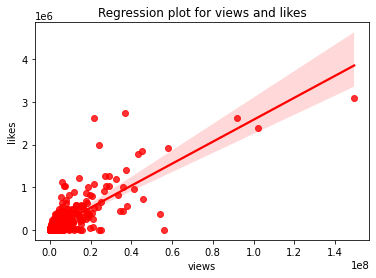

In [12]:
# Let's do a regression plot to see the relarionship between views and likes
sns.regplot(data=trending, x='views', y='likes', color='Red')
plt.title('Regression plot for views and likes')

This plot is showing a linear relationship between views and likes.

Text(0.5, 1.0, 'Regression plot for views and dislikes')

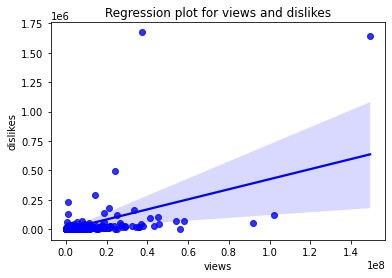

In [14]:
# Let's perform a regression plot to see the relarionship between views and dislikes
sns.regplot(data=trending, x='views', y='dislikes', color= 'blue')
plt.title('Regression plot for views and dislikes')

Compared to the first plot, the dislikes increase as the views increase, but not as much as the first plot. Notice the steeper line in the first graph.

In [16]:
# Let's view our correlation table:likes, dislikes, views, and comments
df_corr= trending[['likes', 'dislikes', 'comment_count', 'views']]
df_corr.corr()

,likes,dislikes,comment_count,views
likes,1.000000,0.460294,0.712927,0.820951
dislikes,0.460294,1.000000,0.833591,0.528939
comment_count,0.712927,0.833591,1.000000,0.573385
views,0.820951,0.528939,0.573385,1.000000


<AxesSubplot:>

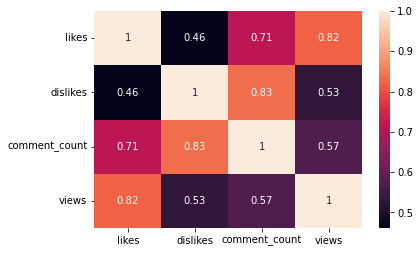

In [17]:
sns.heatmap(df_corr.corr(), annot= True)

Notice a high correlation between views and likes. That makes sense!
people who like a video tend to leave a comment and vice versa. Howver people who dislike tend not to leave a comment or vice versa.

In [18]:
# What are the video titles with most likes count
trending[['title', 'likes']].groupby('title').sum().sort_values(by= 'likes', ascending= False).head(5)

,likes
title,
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,3093544
BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Official MV,2729292
j-hope 'Daydream (백일몽)' MV,2626585
Marvel Studios' Avengers: Infinity War Official Trailer,2625661
"Luis Fonsi, Demi Lovato - Échame La Culpa",2376636


In [19]:
# What are the video titles with most dislikes count
trending[['title', 'dislikes']].groupby('title').sum().sort_values(by= 'dislikes', ascending= False).head(5)

,dislikes
title,
So Sorry.,1674420
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,1643059
Suicide: Be Here Tomorrow.,497847
LOGAN PAUL IS BACK!,291900
PSA from Chairman of the FCC Ajit Pai,228426


In [20]:
# What are the video titles with most comments count
trending[['title', 'comment_count']].groupby('title').sum().sort_values(by= 'comment_count',ascending= False ).head(5)

,comment_count
title,
So Sorry.,1361580
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,810698
Suicide: Be Here Tomorrow.,658130
BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Official MV,546100
j-hope 'Daydream (백일몽)' MV,471584


## Sentiment Analysis**

#### Analyze trending tags

In [21]:
# Display tags
trending.tags.head(10)

0                                      SHANtell martin
1    last week tonight trump presidency|last week t...
2    racist superman|rudy|mancuso|king|bach|racist|...
3    rhett and link|gmm|good mythical morning|rhett...
4    ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...
5    ijustine|week with iPhone X|iphone x|apple|iph...
6    SNL|Saturday Night Live|SNL Season 43|Episode ...
7    5 Ice Cream Gadgets|Ice Cream|Cream Sandwich M...
8    Trailer|Hugh Jackman|Michelle Williams|Zac Efr...
9    vox.com|vox|explain|shift change|future of wor...
Name: tags, dtype: object

In [24]:
# Let's join tags to get all lines in just one string.
tags_complete=''.join(str(trending.tags))

In [25]:
# Display tags as one string
# Rub this to see the result: tags_complete

### As you can see, we got some special charachters in our text. Ex: |, so the next step is to remove the special characters to end up with clean looking data

In [26]:
# Let's import regular expression module
import re

In [27]:
# Now we have to substitue any special character by a space.
tags= re.sub('[^a-zA-Z]', ' ', tags_complete)

In [28]:
# Display tags
tags;

## Emoji Analysis

In [26]:
# Install Emoji library.
#!pip install emoji

In [33]:
# Import module emoji
import emoji

Keep in mind that each emoji has a unicode

In [55]:
# Let's define a string "str." We are creating a list for the emojis (if a character has a unicode then it will
# be considered an emoji)
str=''
for i in trending.title:
#     list=[c for c in i if c in emoji.UNICODE_EMOJI()]
    list=[c for c in i if c in emoji.UNICODE_EMOJI['en']]
    for ele in list:
        str= str+ele


AttributeError: module 'emoji' has no attribute 'UNICODE_EMOJI'

In [53]:
new_line_list

[':grinning_face_with_smiling_eyes:', ':grinning_face_with_sweat:']

In [39]:
# How many emojis do we have in our dataset?
len(str)

0

In [30]:
# This is how our str looks like
str

'🌭❤😭☁🍞⚔🌭❤😭☁🍞⚔🌭❤😭☁🍞⚔🌭❤😭👅🥊❌👅™🥊❌👶👅™🥊❌👶💕👅™🥊❌💕👶👅™🥊❌💕👶👅™🥊®💕👅👶™®💕🏆🏆®🏡🏆®®🏡🏆®®®™🏡®🏡😱®®™🏡😱®®™⚔⚔😱😱®®™⚔⚔😱🇧🇷😱®®™🌿⚔⚔😱😱🇧🇷®🌿⚔⚔😱😱🇧🇷🌿⚔⚔😱😱🇧🇷😱🐶👋🏋🤯®🌿⚔⚔👶😱🐶👋🏋🤯®🌿👶🤔💔⚽😱🐶👋🏋®🤔💔👶⚽😱🐶👋🏋®®🤔💔👶⚽😱🐶®🤔💔👶😱⚽®🤔💔👶😱🤔💔👶®🤔💔👶®😮😮😮✏✏✏😮✏✏✏✨😮✏✏✏🤣🇲🇽✨🎥🤣🇲🇽✨🎥🤣🇲🇽✨😈🎥🤣🇲🇽😈🤣🇲🇽®®™😈🎥🤣🇲🇽👀🍿®®™🎥😈👀🍿®®™🎥😈🔴🔴🍂🙄👀🍿®®™🎥😈🔴🔴🍂🙄👀🍿®®™🎥😈⚡🍂🙄👀🍿✖⚡🍂🏠✖⚡🍂🏠✖⚡🍂🏠🍰✖⚡™🙏🏾🍰✖⚡🙏🏾🍰✖™🙏🏾🍰™🙏🏾™🎀🤑™🎀💔🔥❌🥀🤑🚨💔🎀🔥❌🥀🤑🚨💔🎀🔥❌🥀🤑🚨👀💋❌❌❌❌❌✖✖✖💔🎀🔥❌🥀👀💋❌\U0001f9ca💎💵❌❌❌❌❌✖✖✖💔🎀👻🎶👀💋❤☕❌\U0001f9ca💎💵❌❌❌❌❌✖✖✖💔🌧🌧👻🎶👀💋❤☕❌\U0001f9ca💎💵🌧🌧👨🚀👻👻🎶💋👀❤☕👨🚀👻👻🎶💋👀❤☕🌧🌧👨🚀👻👻🎶💋❤☕👀🔥🔥🌧🌧👨🚀👻👻🎶🔥🔥🌧🌧👨🚀👻®🔥🔥🌧🌧👨🚀👻™🎃👻🐰®®™🎃👻🐰®🔴🎁👑🎁🎃👻🐰™🔴🎁👑🎁🎃👻🐰™👑👻🎅🔴🎁👑🎁🎃👻🐰™👑👻🎅🔴🎁👑🎁👑👻🎅🔴😭💍👑👻🎅🔴💍😭👑👻🎅🔴🔴👉🇺🇸❄😱😭👑👻🎅🔴💚❄😱📱📞💍😭👑👻🎅💚❄😱📱📞🔴👉🇺🇸😭💍👑👻💚❄😱📱📞🔴👉🇺🇸😭💍👑👻💚❄😱📱📞🔴👉🇺🇸😭💍💙💚❄😱📱📞😭💍🔴👉🇺🇸💙💚❄😱📱📞😭💍🔴👉🇺🇸🛠🇩🇴💚❄😱📱📞😭💍🛠🇩🇴💙💚🛠🇩🇴💙🕒®🛠🇩🇴💙®🕒®🛠🇩🇴💙®🕒®🛠®®🕒🥳®🏆🎮🥳🥳🥳🥳🎄🎄👊🎄🎄🎄🎄🎄🎄😮😮🤯®™😮🤯🎁®™‼💕❤🎄😮🤯🎁❤‼💕❤🎄🤯😮®™🎧❤🎁😳😊®™‼💕❤🎄👑💄🤯®™🎧❤🎁😳😊®™👑💄‼💕❤🎄®™🎧❤🎁😳😊®™👑💄‼💕❤🎄®™⛄🧑💻🎧❤🎁☃❄😱👑®™®™🎧❤⛄🧑💻🎁☃❄😱👑®™®™🎧☃❄😱👑®™®™🥺🚐🚘☃❄😱👑®™®™™🥺☃❄😱👑®™🥺™☃❄😱👑™🥺☃❄™🥺💍🍔☕™🥺💍🍔💍🍔👑🎄📺🍔👑🎄📺🎄💍🍔👑🎄📺🎄💍🍔👑👑🎄📺🎄🎄💍😰👑🎄📺🎄🎄💍😰👑🎄📺🎄🎄💍🎆🔴😰👑👑🎄📺🎄🎄💍🎆🔴😰👑👑🎄📺🎄🎄💔🎆🔴😰👑👑🎄📺🎄🎄🎆🔴😰👑‼💔🎆🔴😰👑🔴💔‼🎆🔴😰👑®🔴💔‼🎆🔴😰👑‼🎆🔴😰👑‼🎆🔴®🔴‼🎂🥳❤®🔴👑👑🎂🥳❤®🔴👑👑🎂🥳❤®🔴💕👑👑🎂🥳❤®💚💕👑👑🎂🥳❤🥶💚💕👑👑🎂🥳❤😅💸🥶💚💕👑👑🎂🥳❤💝😅💸🥶💚💕👑👑🎂🥳❤😅💸🥶💚💕👑👑💝😅💸🥶💚💕💝😅💸🥶💚

In [31]:
# Let's count the unique emojis
result={}
for i in set(str):
    result[i]= str.count(i)

In [32]:
result.items()

dict_items([('🍞', 3), ('🚘', 1), ('💸', 5), ('🔥', 10), ('🥀', 4), ('💝', 3), ('🏋', 4), ('™', 49), ('🥊', 6), ('🥶', 6), ('😱', 33), ('🔴', 33), ('🇧', 4), ('🇴', 5), ('💎', 3), ('🌭', 4), ('🤯', 7), ('🛠', 6), ('☃', 7), ('✏', 9), ('💚', 15), ('🌧', 12), ('⚽', 4), ('🍿', 5), ('🎂', 8), ('🚐', 1), ('🎶', 6), ('💋', 7), ('❌', 27), ('⚡', 6), ('📞', 7), ('😊', 3), ('💙', 6), ('💄', 3), ('😰', 10), ('🥳', 13), ('🇩', 5), ('🇸', 6), ('👻', 26), ('👅', 7), ('😮', 10), ('🏠', 3), ('🏾', 4), ('🇲', 6), ('✖', 15), ('🇷', 4), ('👶', 13), ('🕒', 4), ('🙏', 4), ('🇺', 6), ('🎃', 5), ('🇽', 6), ('🧑', 2), ('💵', 3), ('😅', 5), ('🏡', 5), ('🐰', 5), ('👑', 56), ('🍔', 6), ('💕', 18), ('😭', 14), ('🍰', 4), ('‼', 11), ('🚨', 3), ('🤣', 6), ('👀', 12), ('👉', 6), ('💔', 17), ('🎮', 1), ('❤', 28), ('📺', 9), ('🏆', 5), ('❄', 15), ('⛄', 2), ('\U0001f9ca', 3), ('🎥', 8), ('💻', 2), ('🎄', 36), ('☕', 6), ('📱', 7), ('🌿', 5), ('🎧', 6), ('👊', 1), ('🎆', 9), ('👋', 4), ('😈', 7), ('®', 73), ('😳', 3), ('🙄', 3), ('✨', 4), ('🎀', 6), ('⚔', 15), ('🚀', 6), ('🍂', 6), ('🥺', 6), ('🎁',

In [33]:
# I will define a dictionary final that has each imoji(key) and its count(value)
final={}
for key, value in sorted(result.items(), key= lambda item:item[1]):
    final[key]= value

In [34]:
# Display our final result
final

{'🚘': 1,
 '🚐': 1,
 '🎮': 1,
 '👊': 1,
 '🧑': 2,
 '⛄': 2,
 '💻': 2,
 '🍞': 3,
 '💝': 3,
 '💎': 3,
 '😊': 3,
 '💄': 3,
 '🏠': 3,
 '💵': 3,
 '🚨': 3,
 '\U0001f9ca': 3,
 '😳': 3,
 '🙄': 3,
 '☁': 3,
 '🥀': 4,
 '🏋': 4,
 '🇧': 4,
 '🌭': 4,
 '⚽': 4,
 '🏾': 4,
 '🇷': 4,
 '🕒': 4,
 '🙏': 4,
 '🍰': 4,
 '👋': 4,
 '✨': 4,
 '🤑': 4,
 '💸': 5,
 '🇴': 5,
 '🍿': 5,
 '🇩': 5,
 '🎃': 5,
 '😅': 5,
 '🏡': 5,
 '🐰': 5,
 '🏆': 5,
 '🌿': 5,
 '🐶': 5,
 '🥊': 6,
 '🥶': 6,
 '🛠': 6,
 '🎶': 6,
 '⚡': 6,
 '💙': 6,
 '🇸': 6,
 '🇲': 6,
 '🇺': 6,
 '🇽': 6,
 '🍔': 6,
 '🤣': 6,
 '👉': 6,
 '☕': 6,
 '🎧': 6,
 '🎀': 6,
 '🚀': 6,
 '🍂': 6,
 '🥺': 6,
 '👨': 6,
 '🤯': 7,
 '☃': 7,
 '💋': 7,
 '📞': 7,
 '👅': 7,
 '📱': 7,
 '😈': 7,
 '🤔': 7,
 '🎅': 7,
 '🎂': 8,
 '🎥': 8,
 '✏': 9,
 '📺': 9,
 '🎆': 9,
 '🔥': 10,
 '😰': 10,
 '😮': 10,
 '‼': 11,
 '🌧': 12,
 '👀': 12,
 '🥳': 13,
 '👶': 13,
 '😭': 14,
 '💚': 15,
 '✖': 15,
 '❄': 15,
 '⚔': 15,
 '🎁': 15,
 '💔': 17,
 '💕': 18,
 '💍': 18,
 '👻': 26,
 '❌': 27,
 '❤': 28,
 '😱': 33,
 '🔴': 33,
 '🎄': 36,
 '™': 49,
 '👑': 56,
 '®': 73}

In [35]:
# Now, we create a data frame for the top used 10 emojis
keys= [*final.keys()]
values=[*final.values()]
df= pd.DataFrame(keys[-10:], values[-10:])

# Visulize my emojis

In [36]:
df= pd.DataFrame({'chars': keys[-10:], 'num': values[-10]})

In [37]:
# Import libraries and modules
import plotly.graph_objs as go
from plotly.offline import iplot

In [38]:
graph = go.Bar(
x= df['chars'],
y= df['num'])
iplot([graph] )
# Hover over the bars to view the emojis along with the count

# The END